### Bank Term Deposit Subscription Prediction
### Team 9 : Srinivas, Ravi
### LTC - IIT M Batch 1 - Sep 2025

In [1]:
#Load the synthetic data set from the P5S8 challenge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
train_syndata = pd.read_csv('./playground-series-s5e8/train.csv')
test_syndata = pd.read_csv('./playground-series-s5e8/test.csv')

# Display the first few rows of the training data
print(train_syndata.head())
# Display the first few rows of the test data
print(test_syndata.head())




   id  age          job  marital  education default  balance housing loan  \
0   0   42   technician  married  secondary      no        7      no   no   
1   1   38  blue-collar  married  secondary      no      514      no   no   
2   2   36  blue-collar  married  secondary      no      602     yes   no   
3   3   27      student   single  secondary      no       34     yes   no   
4   4   26   technician  married  secondary      no      889     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y  
0  cellular   25   aug       117         3     -1         0  unknown  0  
1   unknown   18   jun       185         1     -1         0  unknown  0  
2   unknown   14   may       111         2     -1         0  unknown  0  
3   unknown   28   may        10         2     -1         0  unknown  0  
4  cellular    3   feb       902         1     -1         0  unknown  1  
       id  age            job  marital  education default  balance housing  \
0  750000   32 

In [2]:
#Load the real data set from the P5S8 channelnge
fulldata = pd.read_csv('./archive/bank-full.csv', sep=';')
print(fulldata.head())   

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


####  1. Data Understanding & Exploration
####  Load both datasets and explore:– Feature types (categorical, numerical) – Missing values – Target distribution

In [3]:
# Find the the number and names of the columns in both datasets
print("Training Data Columns: and shape", train_syndata.columns, train_syndata.shape)
print("Test Data Columns: and shape", test_syndata.columns, test_syndata.shape)
print("Full Data Columns: and shape", fulldata.columns, fulldata.shape)

Training Data Columns: and shape Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object') (750000, 18)
Test Data Columns: and shape Index(['id', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object') (250000, 17)
Full Data Columns: and shape Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object') (45211, 17)


 Synthetic dataset: Available in the competition’s Dataset Link. Train and Test
 dataset are given. You can combine both the dataset for training
 • Test Dataset: extract 20 % of dataset from Real Dataset for testing the prediction
 accuracy of your model.

In [15]:
# Now we need to combine the Train and Test to make it a single training data set
# The outcome variable 'y' is not present in the test data, so we will add a placeholder column for it
# Since the test data does not have 'y', we will fill it with mode of the train data 'y' column
print("Mode of 'y' in training data:", train_syndata['y'].mode())
test_syndata['y'] = train_syndata['y'].mode()[0]  # Add a placeholder column for 'y' in the test set

# Combine the training and test datasets
syndata = pd.concat([train_syndata, test_syndata], ignore_index=True)
print("Combined Synthetic Data shape:", syndata.shape)

Mode of 'y' in training data: 0    0
Name: y, dtype: int64
Combined Synthetic Data shape: (1000000, 18)


In [16]:
# Remove the "id" column from the Synthetic Data dataframe if it exists

if 'id' in syndata.columns:
    syndata = syndata.drop(columns=['id'])

print("Combined Synthetic Data shape:", syndata.shape)

Combined Synthetic Data shape: (1000000, 17)


In [38]:
# Take 20% of the full data as test set
_, test_fulldata = train_test_split(fulldata, test_size=0.2, random_state=42)
print("Test Full Data shape:", test_fulldata.shape)

Test Full Data shape: (9043, 17)


In [39]:
# Compare the feature types of both datasets
# for each feature name in both datasets that match, check if they have same dtype
# or inferred same dtype
# print only the differerences

for col in syndata.columns:
    if col in test_fulldata.columns:
        if syndata[col].dtype != test_fulldata[col].dtype:
            print(f"Column '{col}': syndata dtype = {syndata[col].dtype}, test_fulldata dtype = {test_fulldata[col].dtype}")

Column 'y': syndata dtype = int64, test_fulldata dtype = object


In [40]:
# Count the number of numerical and categorical feature types in the synthetic dataset

syndata_numerical = syndata.select_dtypes(include=['int64', 'float64']).columns
syndata_categorical = syndata.select_dtypes(include=['object', 'category']).columns
test_fulldata_numerical = test_fulldata.select_dtypes(include=['int64', 'float64']).columns
test_fulldata_categorical = test_fulldata.select_dtypes(include=['object', 'category']).columns

print(f"Synthetic Data - Numerical: {len(syndata_numerical)}, Categorical: {len(syndata_categorical)}")
print(f"Test Full Data - Numerical: {len(test_fulldata_numerical)}, Categorical: {len(test_fulldata_categorical)}")

Synthetic Data - Numerical: 8, Categorical: 9
Test Full Data - Numerical: 7, Categorical: 10


In [41]:
# Find columns where the type (numerical/categorical) does not match between synthetic and full data

mismatched_columns = []

for col in syndata.columns:
    if col in test_fulldata.columns:
        syndata_type = 'numerical' if syndata[col].dtype in ['int64', 'float64'] else 'categorical'
        test_fulldata_type = 'numerical' if test_fulldata[col].dtype in ['int64', 'float64'] else 'categorical'
        if syndata_type != test_fulldata_type:
            mismatched_columns.append((col, syndata_type, test_fulldata_type))

if mismatched_columns:
    print("Columns with mismatched types between synthetic and full data:")
    for col, syn_type, full_type in mismatched_columns:
        print(f"{col}: Synthetic = {syn_type}, Full = {full_type}")
else:
    print("No mismatched columns found.")

Columns with mismatched types between synthetic and full data:
y: Synthetic = numerical, Full = categorical


In [42]:
# Print column names and data types side by side for quick comparison

syn_types = syndata.dtypes.to_frame('Synthetic dtype')
full_types = test_fulldata.dtypes.to_frame('Full dtype')
comparison = syn_types.join(full_types, how='outer')
print(comparison.reset_index().rename(columns={'index': 'column'}).to_string(index=False))

   column Synthetic dtype Full dtype
      age           int64      int64
  balance           int64      int64
 campaign           int64      int64
  contact          object     object
      day           int64      int64
  default          object     object
 duration           int64      int64
education          object     object
  housing          object     object
      job          object     object
     loan          object     object
  marital          object     object
    month          object     object
    pdays           int64      int64
 poutcome          object     object
 previous           int64      int64
        y           int64     object


In [43]:
print("Distinct values in 'y' and their counts (Synthetic Data):")
print(pd.concat([syndata['y'].value_counts(), syndata['y'].value_counts(normalize=True)], axis=1))
print("Distinct values in 'y' and their counts (Test Full Data):")
print(pd.concat([test_fulldata['y'].value_counts(), test_fulldata['y'].value_counts(normalize=True)],axis=1))

Distinct values in 'y' and their counts (Synthetic Data):
    count  proportion
y                    
0  909512    0.909512
1   90488    0.090488
Distinct values in 'y' and their counts (Test Full Data):
     count  proportion
y                     
no    7952    0.879354
yes   1091    0.120646


In [44]:
# Convert "no" to 0 and "yes" to 1 in the 'y' column of test_fulldata

if 'y' in test_fulldata.columns:
    test_fulldata['y'] = test_fulldata['y'].map({'no': 0, 'yes': 1})

print("Distinct values in 'y' and their counts (Synthetic Data):")
print(pd.concat([syndata['y'].value_counts(), syndata['y'].value_counts(normalize=True)], axis=1))
print("Distinct values in 'y' and their counts (Test Full Data):")
print(pd.concat([test_fulldata['y'].value_counts(), test_fulldata['y'].value_counts(normalize=True)],axis=1))

Distinct values in 'y' and their counts (Synthetic Data):
    count  proportion
y                    
0  909512    0.909512
1   90488    0.090488
Distinct values in 'y' and their counts (Test Full Data):
   count  proportion
y                   
0   7952    0.879354
1   1091    0.120646


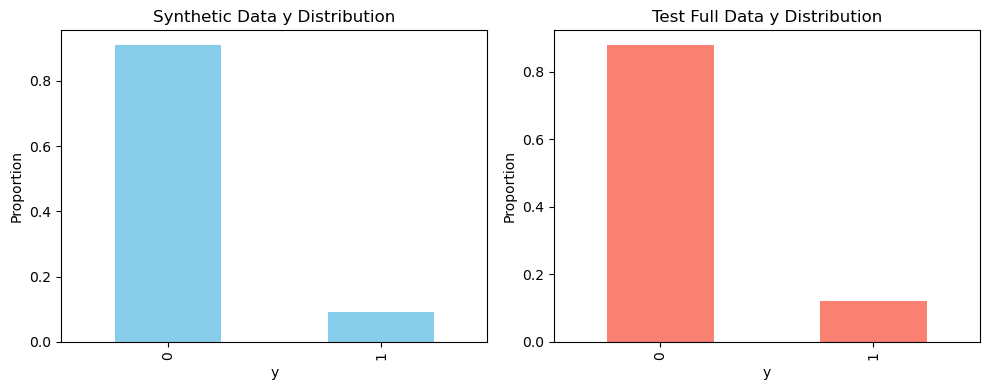

In [45]:
# Plot the distribution of "y" variable side by side for synthetic and test full data

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

syndata['y'].value_counts(normalize=True).plot(kind='bar', ax=axes[0], color='skyblue', title='Synthetic Data y Distribution')
axes[0].set_xlabel('y')
axes[0].set_ylabel('Proportion')

test_fulldata['y'].value_counts(normalize=True).plot(kind='bar', ax=axes[1], color='salmon', title='Test Full Data y Distribution')
axes[1].set_xlabel('y')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [46]:
# Explore missing values in syndata, ignoring 'y' and features without missing values

missing = syndata.drop(columns=['y'], errors='ignore').isnull().sum()
missing = missing[missing > 0]
print("Features with missing values in syndata (excluding 'y'):")
print(missing)

Features with missing values in syndata (excluding 'y'):
Series([], dtype: int64)


In [48]:
# Compare summary statistics between synthetic data and test full data for numerical features
# Highlight statistically significant deviations

import numpy as np

numerical_cols = [col for col in syndata.select_dtypes(include=['int64', 'float64']).columns if col in test_fulldata.columns]

syn_stats = syndata[numerical_cols].describe().T
test_stats = test_fulldata[numerical_cols].describe().T

comparison = syn_stats[['mean', 'std', 'min', 'max']].join(
    test_stats[['mean', 'std', 'min', 'max']],
    lsuffix='_synthetic', rsuffix='_test'
)

# Highlight columns where mean differs by more than 10% (relative difference)
comparison['mean_diff_pct'] = np.abs(comparison['mean_synthetic'] - comparison['mean_test']) / (comparison['mean_test'] + 1e-9)
significant = comparison[comparison['mean_diff_pct'] > 0.1]

print("Summary statistics for numerical features (synthetic vs test full data):")
print(comparison)

if not significant.empty:
    print("\nFeatures with >10% difference in mean between synthetic and test full data:")
    print(significant[['mean_synthetic', 'mean_test', 'mean_diff_pct']])
else:
    print("\nNo features with >10% difference in mean found.")

Summary statistics for numerical features (synthetic vs test full data):
          mean_synthetic  std_synthetic  min_synthetic  max_synthetic  \
age            40.927879      10.094523           18.0           95.0   
balance      1202.407136    2812.750998        -8019.0        99717.0   
day            16.116924       8.252748            1.0           31.0   
duration      256.007423     272.268420            1.0         4918.0   
campaign        2.576143       2.716302            1.0           63.0   
pdays          22.379557      77.219149           -1.0          871.0   
previous        0.299841       1.348254            0.0          200.0   
y               0.090488       0.286880            0.0            1.0   

            mean_test     std_test  min_test  max_test  mean_diff_pct  
age         40.957757    10.620892      18.0      93.0       0.000729  
balance   1367.175163  3130.151376   -2712.0   98417.0       0.120517  
day         15.761141     8.309233       1.0      31.